<a href="https://colab.research.google.com/github/frankiemal/Python_Exercises/blob/main/Working_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!unzip '/content/gdrive/MyDrive/AI_COLLAB/dataset.zip'

Streaming output truncated to the last 5000 lines.
  inflating: dataset/utthita parsvakonasana/87-0.png  
  inflating: __MACOSX/dataset/utthita parsvakonasana/._87-0.png  
  inflating: dataset/utthita parsvakonasana/47-0.png  
  inflating: __MACOSX/dataset/utthita parsvakonasana/._47-0.png  
  inflating: dataset/urdhva prasarita eka padasana/92-1.png  
  inflating: __MACOSX/dataset/urdhva prasarita eka padasana/._92-1.png  
  inflating: dataset/urdhva prasarita eka padasana/33-0.png  
  inflating: __MACOSX/dataset/urdhva prasarita eka padasana/._33-0.png  
  inflating: dataset/urdhva prasarita eka padasana/17-0.png  
  inflating: __MACOSX/dataset/urdhva prasarita eka padasana/._17-0.png  
  inflating: dataset/urdhva prasarita eka padasana/28-0.png  
  inflating: __MACOSX/dataset/urdhva prasarita eka padasana/._28-0.png  
  inflating: dataset/urdhva prasarita eka padasana/15-0.png  
  inflating: __MACOSX/dataset/urdhva prasarita eka padasana/._15-0.png  
  inflating: dataset/urdhva pras

In [ ]:
import tensorflow.keras.preprocessing.image as img_to_array
import matplotlib.pyplot as plt
import numpy as np
import os
from os import listdir
from google.colab.patches import cv2_imshow
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers

In [ ]:
def show_folder2(name,label_name):
  path = "/content/dataset/"+name+'/' #path name for the folder of each pose
  IMG_SIZE = 128
  for images in os.listdir(path):
     # check if the image ends with png
    if (images.endswith(".png")):
        path_new=path+images # path of each image
        img=cv2.imread(path_new)[:,:,::-1] # reads the image
        resize_and_rescale = Sequential([layers.Resizing(IMG_SIZE, IMG_SIZE),layers.Rescaling(1./255)])
        img = resize_and_rescale(img) 
        label.append(label_name) # adds label
        data.append(img) # adds data
  return label, data

In [ ]:
# creates a list of set features for 7 of the classes
data = [] # data array of the images
label=[] # label array
counter=-1
for folder in os.listdir('/content/dataset'):
  counter+=1
  if counter<7:
    print(counter)
    if folder!= '.DS_Store':
      print(folder)
      label_list, data_list=show_folder2(folder,counter)
# need to remove .DS_store()

0
prasarita padottanasana
1
kurmasana
2
tittibhasana
3
eka pada rajakapotasana ii
4
virabhadrasana iii
5
salamba bhujangasana
6
garudasana


In [ ]:
# sets features and labels 
X= np.array(data_list)
y= np.array(label_list)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y ,test_size=0.2, random_state=42, shuffle=True)

#X0 = np.array(x_train)
#y0 = np.array(y_train)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42, shuffle=True)

height = x_train.shape[1]
width = x_train.shape[2]
channels = 3
print(x_train.shape)

num_classes = len(np.unique(y_train))

#reshape x_train and x_test
x_train_cnn = x_train.reshape(x_train.shape[0], height, width, channels)
x_test_cnn = x_test.reshape(x_test.shape[0], height, width, channels)

x_val_cnn = x_val.reshape(x_val.shape[0], height, width, channels)

y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

y_val_categorical = to_categorical(y_val)

(244, 128, 128, 3)


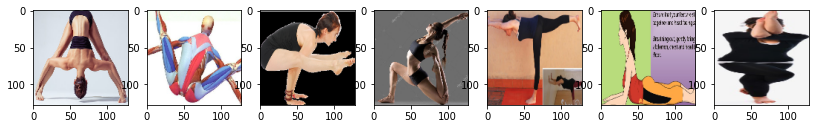

In [ ]:
#create figure specifying size
fig = plt.figure(figsize = (20,20))

#plot 1 image from each class
for i in range(num_classes):
  #add suplot to add them to
  fig.add_subplot(1, 10, i+1)
  #find index of class interested in
  idx = np.where(y_train==i)[0]
  #access actual image for it
  im = x_train[idx][0]

  plt.imshow(im)

In [ ]:
#import packages needed for CNN layers
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow. keras.layers import Flatten
from tensorflow.keras.layers import Dropout

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(height, width, channels)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.2))
# filters=32 so weights are learned by training network using specified loss 32 times
# kernel = size of each filter so (5,5) takes in 25 pixels each time 
# Max pooling downsamples input so (2,2) means theres a 2x2 window over input taking max value in window each time.
# Strides moves each pixel in input -- (2,2) means moves pixels 2 right and 2 down
# RELU prevents exp growth in computation and introduces non-linearity ---- if -ve output= 0, if +ve output = input

#Dropout layers added after each pooling and dense layer to help prevent overfitting

#Adding more filters as add more layers, ensuring specific features are learned
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu',))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.2))

#Flattens output into something which the NN can process as not 1D
# Needed as fully connected layer performs the classification
model.add(Flatten())

# Adding less filters with later dense layers, reducing parameters with each layer to help prevent overfitting
# Softmax transforms outputs within num_classes into a vector of probabilities
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer= optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# catagorical cross entroy uses loss fucntion for multiclass classification 

es = EarlyStopping(monitor='val_accuracy',verbose=1, patience=10)

#train our model
#history = model.fit(x_train, y_train,epochs=200,batch_size=16,validation_data=(x_val, y_val), callbacks=[es])

In [ ]:
# history is fitting the model on training set
history = model.fit(x_train_cnn, y_train_categorical, epochs=50, validation_data=(x_val, y_val_categorical), callbacks=[es])

Epoch 1/50
8/8 [==============================] - 16s 2s/step - loss: 2.5854 - accuracy: 0.1434 - val_loss: 2.0441 - val_accuracy: 0.0854
Epoch 2/50
8/8 [==============================] - 12s 2s/step - loss: 2.0335 - accuracy: 0.1516 - val_loss: 1.9403 - val_accuracy: 0.1341
Epoch 3/50
8/8 [==============================] - 13s 2s/step - loss: 1.9149 - accuracy: 0.2090 - val_loss: 1.9331 - val_accuracy: 0.2195
Epoch 4/50
8/8 [==============================] - 9s 1s/step - loss: 1.8982 - accuracy: 0.1639 - val_loss: 1.9108 - val_accuracy: 0.2317
Epoch 5/50
8/8 [==============================] - 12s 1s/step - loss: 1.8419 - accuracy: 0.2910 - val_loss: 1.8638 - val_accuracy: 0.4146
Epoch 6/50
8/8 [==============================] - 14s 2s/step - loss: 1.7664 - accuracy: 0.3975 - val_loss: 1.7965 - val_accuracy: 0.3902
Epoch 7/50
8/8 [==============================] - 13s 2s/step - loss: 1.6319 - accuracy: 0.4344 - val_loss: 1.6769 - val_accuracy: 0.5244
Epoch 8/50
8/8 [===================

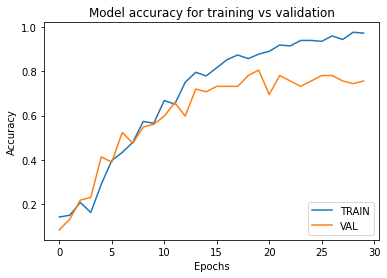

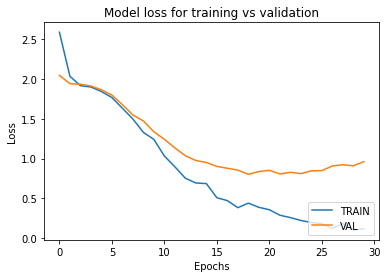

In [ ]:
#plot train and validation accuracy for each epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy for training vs validation')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['TRAIN', 'VAL'], loc='lower right')
plt.show()

#plot train and validation loss for each epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss for training vs validation')
plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.legend(['TRAIN', 'VAL'], loc='lower right')
plt.show()

In [ ]:
loss, accuracy = model.evaluate(x_test_cnn, y_test_categorical)
print('> %.3f' % (accuracy * 100.0))

3/3 [==============================] - 1s 300ms/step - loss: 1.0466 - accuracy: 0.7439
> 74.390


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    fig, ax = plt.subplots(figsize=(8,8))
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=classes, yticklabels=classes, cmap="Blues")
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

In [ ]:
y_pred = model.predict(x_test_cnn)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_categorical, axis=1)

3/3 [==============================] - 1s 180ms/step


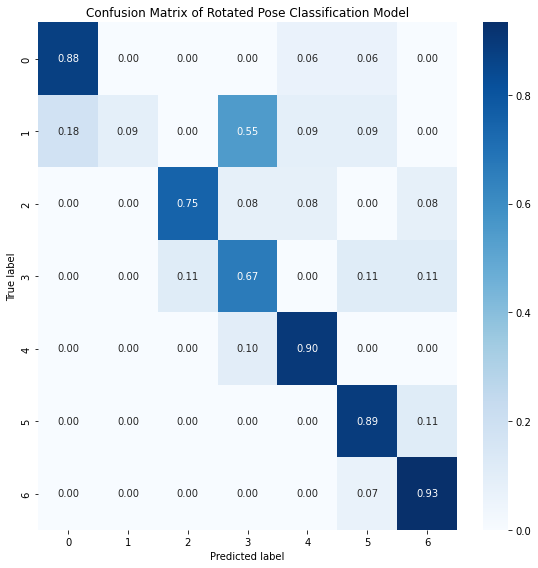

In [ ]:
plot_confusion_matrix(y_true, y_pred, classes=range(num_classes), title ='Confusion Matrix of Rotated Pose Classification Model')